This notebook is to show how to read a LiPD file and generate ensemble of age-depth models by python packages LiPD (https://github.com/nickmckay/LiPD-utilities) and Pyleoclim (https://github.com/LinkedEarth/Pyleoclim_util)

In [17]:
%matplotlib inline
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [12]:
import lipd

In [13]:
lipd_file = lipd.readLipd('Crystal.McCabe-Glynn.2013.lpd')

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Crystal.McCabe-Glynn.2013.lpd
Finished read: 1 record


In [1]:
import pyleoclim as pyleo

In [2]:
lipds = pyleo.openLipd("Crystal.McCabe-Glynn.2013.lpd")

Disclaimer: LiPD files may be updated and modified to adhere to standards

reading: Crystal.McCabe-Glynn.2013.lpd
Finished read: 1 record


In [3]:
ts_list = pyleo.fetchTs(lipds)

extracting paleoData...
extracting: Crystal.McCabe-Glynn.2013
Created time series: 3 entries


0 :  Crystal.McCabe-Glynn.2013 :  depth
1 :  Crystal.McCabe-Glynn.2013 :  age_ad
2 :  Crystal.McCabe-Glynn.2013 :  d18o_vpdb
Enter the number of the variable you wish to use: 2


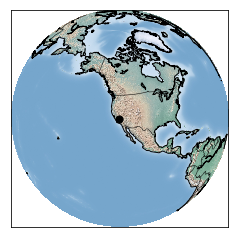

In [4]:
fig = pyleo.mapLipd()

In [7]:
# get d18o time series
d18o=ts_list[2]['paleoData_values']

No previous model available. Creating model...
Looking for age data...
No match found on exact search, running partial match
No match found.
Here are the available variables: 
0 :  sample
1 :  depth
2 :  238u
3 :  238u_uncertainty
4 :  232th
5 :  232th_uncertainty
6 :  230th/232th
7 :  230th/232th_uncertainty
8 :  d234u
9 :  d234u_undertainty
10 :  230th/238u
11 :  230th/238u_uncertainty
12 :  230th age
13 :  230th age_uncertainty
14 :  230th age-1
15 :  230th age_uncertaity
16 :  d234uinitial
17 :  d234uinitial_uncertainty
18 :  230th age-2
19 :  230th age_uncertainty-1
Please select the variable you'd like to use or enter to continue: 18
Age data found.
Looking for a depth/position column...
Depth information found.
Looking for age uncertainty...
More than one series match your search criteria
0 :  d234uinitial_uncertainty
1 :  230th age_uncertainty-1
2 :  230th age_uncertainty
3 :  230th/238u_uncertainty
4 :  230th/232th_uncertainty
5 :  238u_uncertainty
6 :  232th_uncertainty
Enter

  |                                                                  
  |=====================                                       |  36%
  |                                                                  
  |======================                                      |  36%
  |                                                                  
  |======================                                      |  37%
  |                                                                  
  |=======================                                     |  38%
  |                                                                  
  |=======================                                     |  39%
  |                                                                  
  |========================                                    |  39%
  |                                                                  
  |========================                                    |  40%
  |                 

  |                                                                  
  |===============================================             |  78%
  |                                                                  
  |===============================================             |  79%
  |                                                                  
  |================================================            |  79%
  |                                                                  
  |================================================            |  80%
  |                                                                  
  |================================================            |  81%
  |                                                                  
  |=================================================           |  81%
  |                                                                  
  |=================================================           |  82%
  |                 

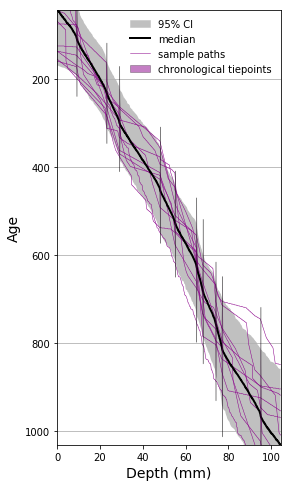

In [14]:
# Run age model BChron
depth, chron, positions, ageDist, fig = pyleo.Bchron(lipd_file, calCurves = ["normal"],reservoirAgeCorr=[0,0],saveLipd=False)

In [15]:
#chron is the array of the ensemble of age model, the first dimension is number of depth_sample
# the second dimension is Monte-Carlo numbers (here is 1000)
chron.shape

(1054, 1000)

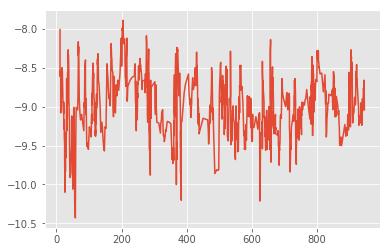

In [18]:
# plot one of possible realization of d18O time series
plt.plot(chron[:,0],d18o)